# TV Serije

Za svoj projekt sem se odločil za analizo trenutno najbolj popularnih (glede na stran imdb.com) 247 tv serij.
Zbral sem naslednje podatke o omenjenih serijah:
- naslov
- kratek opis
- žanri
- leta izida
- dolžine epizod
- število epizod
- ocena, število glasov
- igralci (in vloge)

In [91]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 14

Za začetek si oglejmo vse podatke, zbrane v tabelah:

In [125]:
serije = pd.read_csv('serije.csv', index_col = 'id')
zanri = pd.read_csv('zanri.csv', index_col = 'id')
drzave = pd.read_csv('drzave.csv', index_col = 'id')
igralci = pd.read_csv('igralci.csv')
leta = pd.read_csv('leta.csv', index_col = 'id')

In [151]:
serije

,naslov,opis,leto,dolzina,epizode,ocena,st_glasov
id,,,,,,,
5491994,Planet Earth II,David Attenborough returns in this breathtakin...,2016-,51,7,9.7,17184
185906,Band of Brothers,The story of Easy Company of the US Army 101st...,2001-,54,10,9.5,246659
795176,Planet Earth,"Emmy Award-winning, 11 episodes, 5 years in th...",2006-,43,11,9.5,111641
944947,Game of Thrones,Nine noble families fight for control over the...,2011-,56,73,9.5,1106304
903747,Breaking Bad,A high school chemistry teacher diagnosed with...,2008-2013,49,62,9.5,939633
306414,The Wire,"Baltimore drug scene, seen through the eyes of...",2002-2008,59,60,9.4,200345
2395695,Cosmos: A Spacetime Odyssey,A documentary series that explores how we disc...,2014-,41,13,9.3,66269
...,...,...,...,...,...,...,...
2249364,Broadchurch,The murder of a young boy in a small coastal t...,2013-,48,24,8.4,46620


In [121]:
zanri

,zanr
id,
5491994,Documentary
185906,Action
185906,Drama
185906,History
185906,War
795176,Documentary
944947,Adventure
...,...
310455,Crime


In [122]:
drzave

,drzava
id,
5491994,UK
185906,USA
185906,UK
795176,UK
944947,USA
944947,UK
903747,USA
...,...
54533,USA


In [123]:
igralci

,id,id igralca,ime,vloga
0,5491994,41003,David Attenborough,Himself - presenter
1,185906,342241,Scott Grimes,Donald G. Malarkey
2,185906,507073,Damian Lewis,Richard D. Winters
3,185906,515296,Ron Livingston,Lewis Nixon
4,185906,853169,Shane Taylor,Eugene G. Roe
5,185906,5531,Donnie Wahlberg,C. Carwood Lipton
6,185906,950186,Peter Youngblood Hills,Darrell C. (Shifty) Powers
...,...,...,...,...
3384,2126154,4813425,Autumn Smiles,Titch
3385,2126154,2772078,Ian Smith,Mr. Benson


In [126]:
leta

,leto
id,
5491994,2016
185906,2001
795176,2006
944947,2011
944947,2012
944947,2013
944947,2014
...,...
310455,2011


Pa poglejmo od kod pride največ serij:

In [211]:
tabela1 = serije[['naslov', 'ocena']].join(drzave)
tabela1

,naslov,ocena,drzava
id,,,
43208,I Love Lucy,8.4,USA
47708,Alfred Hitchcock Presents,8.6,USA
52520,The Twilight Zone,9.0,USA
53488,The Bugs Bunny Show,8.6,USA
54533,The Dick Van Dyke Show,8.4,USA
56751,Doctor Who,8.5,UK
60028,Star Trek,8.4,USA
...,...,...,...
5189670,Making a Murderer,8.8,USA


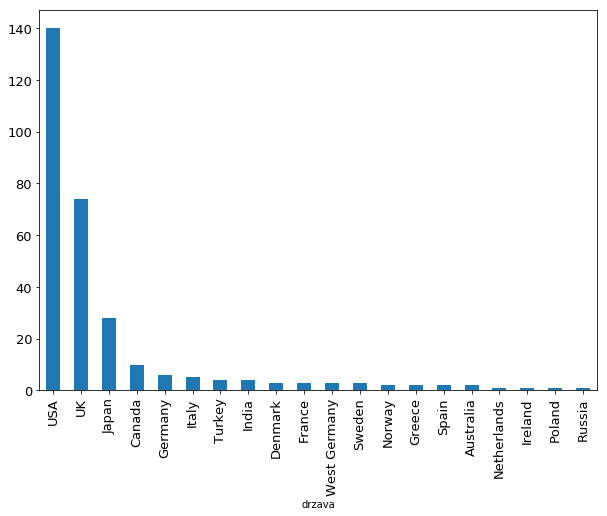

In [273]:
tabela1.groupby('drzava').size().sort_values(ascending = False).plot(kind='bar', figsize = (10, 7), fontsize = 13)

Največ jih je torej iz Združenih držav Amerike, Združenega kraljestva in Japonske. Kateri pa so tam najbolj pogosti žanri?

In [245]:
drzave[drzave['drzava'] == 'USA'].join(zanri).groupby('zanr').size().sort_values(ascending = False).head(10)

zanr
Drama        85
Comedy       54
Thriller     35
Crime        35
Action       29
Mystery      28
Sci-Fi       27
Adventure    24
Animation    21
Fantasy      18
dtype: int64

In [246]:
drzave[drzave['drzava'] == 'UK'].join(zanri).groupby('zanr').size().sort_values(ascending = False).head(10)

zanr
Drama          36
Comedy         31
Mystery        12
Crime          12
Documentary    10
Romance         9
War             7
Sci-Fi          7
History         6
Thriller        6
dtype: int64

In [247]:
drzave[drzave['drzava'] == 'Japan'].join(zanri).groupby('zanr').size().sort_values(ascending = False).head(10)

zanr
Animation    28
Action       24
Adventure    18
Fantasy      17
Drama        17
Thriller     14
Sci-Fi       14
Comedy       14
Horror        6
Romance       5
dtype: int64

Seveda sama količina serij še ne pomeni veliko - bolje je gledati povprečne ocene serij iz teh držav.

In [249]:
a = drzave[drzave['drzava'] == 'USA'].join(serije['ocena']).mean()
a

ocena    8.716429
dtype: float64

In [205]:
drzave[drzave['drzava'] == 'UK'].join(serije['ocena']).mean()

ocena    8.739189
dtype: float64

In [207]:
drzave[drzave['drzava'] == 'Japan'].join(serije['ocena']).mean()

ocena    8.689286
dtype: float64